In [2]:
from itertools import product
from fvhoe.array_manager import get_array_slice as slc
from fvhoe.initial_conditions import sinus
from fvhoe.solver import EulerSolver
from matplotlib import colormaps as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

N=16, p=0, err=0.2870274759705118
N=16, p=1, err=0.0380475695252106
N=16, p=2, err=0.019711546034252347
N=16, p=3, err=0.0008057534213238987
N=32, p=0, err=0.21577823477709407
N=32, p=1, err=0.007880665387516486
N=32, p=2, err=0.0025813182471966165
N=32, p=3, err=3.096216922744005e-05


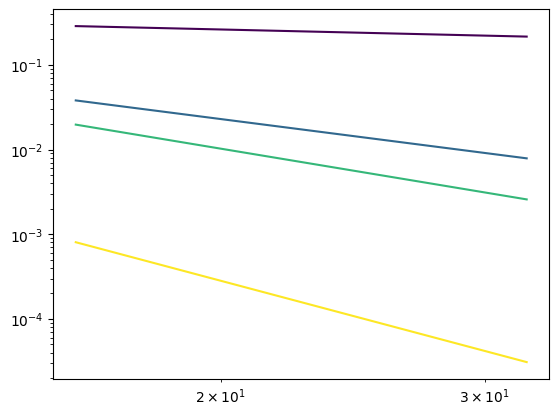

In [3]:
Ns = [16, 32]
ps = [0, 1, 2, 3]


def get_color(p: int):
    return cm["viridis"](p / max(ps))


# generate error data
data = []
for N, p in product(Ns, ps):
    solver = EulerSolver(
        w0=sinus(),
        nx=N,
        ny=N,
        px=p,
        py=p,
        riemann_solver="llf",
        cupy=N * (p + 1) > 64,
        progress_bar=False,
    )
    solver.rkorder(1.0)
    err = np.mean(
        np.abs(
            solver.snapshots[-1]["w"][slc("rho")] - solver.snapshots[0]["w"][slc("rho")]
        )
    )
    data.append(dict(N=N, p=p, err=err))
    print(f"{N=}, {p=}, {err=}")
df = pd.DataFrame(data)

# plot
for p_value, group in df.groupby("p"):
    plt.plot(group["N"], group["err"], label=f"p={p_value}", color=get_color(p_value))
plt.xscale("log")
plt.yscale("log")